In [23]:
#!/usr/bin/env python
# coding: utf-8

# # Make a [tonic](https://tonic.readthedocs.io/en/latest/) dataset - see [documentation](https://tonic.readthedocs.io/en/latest/tutorials/wrapping_own_data.html)
# ## Example with the RGB frames dataset provided by NTUA, translated by UCA into events using vid2e

from dataset_creation_aprovis3d import aprovis3dDataset, loadaerdat
from hots.utils import get_dataset_info
from os import walk, path
import numpy as np
import matplotlib.pyplot as plt

# path where you'll go to find your .npy files to make the dataset with
### TO BE MODIFIED
# path = '../../Data/DVS128_ZED_NUC_jAER/'
data_path = '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/'

In [20]:
event_files = []
for (rep_path, _, files) in walk(data_path):
    for f in files: 
        if f.endswith('aedat'):
            event_files.append(path.join(rep_path, f))
print(event_files)

['/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_5_only_ground/DVS128_06_06_2022_session_5.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_4_only_sea/DVS128_06_06_2022_session_4.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_3_only_ground/DVS128_06_06_2022_session_3.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_6_only_sea/DVS128_06_06_2022_session_6.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_2_only_sea/DVS128_06_06_2022_session_2.aedat', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_1_only_ground/DVS128_06_06_2022_session_1.aedat']


In [21]:
# load data
ev = loadaerdat(event_files[0])
label = 'sea' if 'sea' in event_files[0] else 'ground'
print(label)

dtype = np.dtype([("x", int), ("y", int), ("t", int), ("p", int)])
ordering = dtype.names

file size 7540673
read 942584 (~ 0.94M) AE events, duration= 304.67s
showing first 5:
timestamps: [1378698305, 218768160, 543781664, 1998602565, 1629513321] 
X-addr: [34, 24, 57, 48, 58]
Y-addr: [65, 46, 105, 114, 97]
polarity: [1, 0, 1, 1, 0]
ground


# Display event repartition

In [24]:
min_ts = np.min(ev[:,ordering.index('t')])
max_ts = np.max(ev[:,ordering.index('t')])
print('Min timestamps:', min_ts)
print('Max timestamps:', max_ts)

Min timestamps: 4113026.0
Max timestamps: 4282598039.0


(array([  71., 2789.,  151., ...,   75.,  128.,  192.]),
 array([4.11302600e+06, 4.15581085e+06, 4.19859570e+06, ...,
        4.28251247e+09, 4.28255525e+09, 4.28259804e+09]),
 <BarContainer object of 100000 artists>)

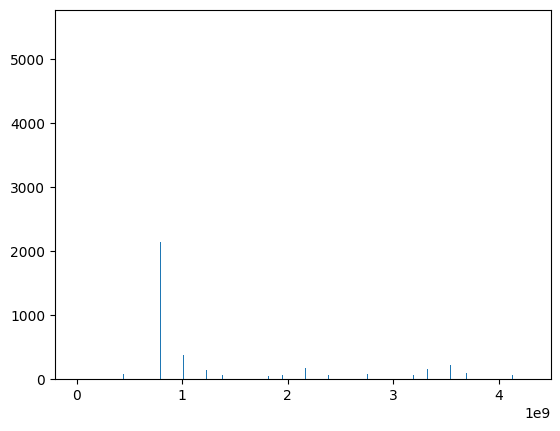

In [28]:
frame_bin=int(1e5)
plt.hist(ev[:, ordering.index('t')], bins=frame_bin)

(array([5.434e+03, 0.000e+00, 0.000e+00, 3.350e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 5.184e+03, 8.160e+02, 0.000e+00, 0.000e+00, 3.680e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 6.224e+03, 3.200e+02, 0.000e+00,
        0.000e+00, 4.043e+03, 0.000e+00, 0.000e+00, 0.000e+00, 5.541e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 3.476e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 4.387e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.392e+03,
        0.000e+00, 0.000e+00, 9.000e+00, 5.791e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 3.445e+03, 0.000e+00, 0.000e+00, 0.000e+00, 6.339e+03,
        0.000e+00, 0.000e+00, 3.030e+03, 1.235e+03, 0.000e+00, 0.000e+00,
        4.865e+03, 9.000e+02, 0.000e+00, 0.000e+00, 3.337e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 4.570e+03, 6.880e+02, 0.000e+00, 0.000e+00,
        3.075e+03, 0.000e+00, 0.000e+00, 0.000e+00, 6.080e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 3.804e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        6.803e+03, 0.000e+00, 0.000e+0

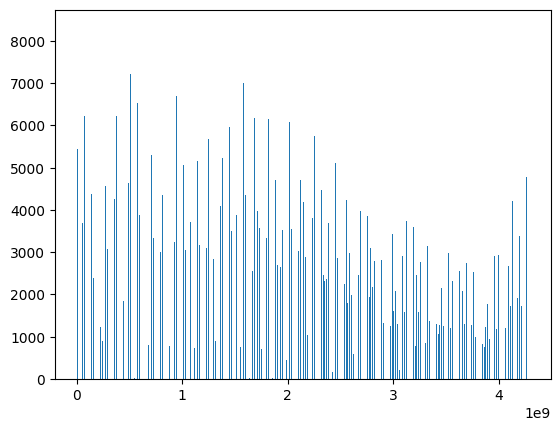

In [29]:
frame_bin=int(1e3)
plt.hist(ev[:, ordering.index('t')], bins=frame_bin)

In [ ]:
t = min_ts
nb_events_per_bin = []
while t < min_ts:
    nb_events_per_bin.append(
        len(ev[t:t+frame_bin])
    )
    t += frame_bin
print(r'Empty bins for bin={frame_bin}:', nb_events_per_bin.count(0))
    